In [114]:
import numpy as np
from cosmoTransitions import generic_potential as gp
from cosmoTransitions.finiteT import Jb_spline as Jb
from cosmoTransitions.finiteT import Jf_spline as Jf

v2=15000.**2
g=0.65
gX=np.sqrt(0.36**2 * g**2 / (g**2 - 0.36**2))
yt=0.9945

In [115]:
class parity_model(gp.generic_potential):
    def init(self, lR):
        self.Ndim = 1
        self.x_eps = 1e-1
        self.T_eps = 1e-3
        self.lR = lR
        self.gX = gX
        self.yt = yt
        self.g = g
        self.renormScaleSq = v2
        self.Tmax = 6000
    def forbidPhaseCrit(self, X):
        """
        forbidPhaseCrit is useful to set if there is, for example, a Z2 symmetry
        in the theory and you don't want to double-count all of the phases. In
        this case, we're throwing away all phases whose zeroth (since python
        starts arrays at 0) field component of the vev goes below -5. Note that
        we don't want to set this to just going below zero, since we are
        interested in phases with vevs exactly at 0, and floating point numbers
        will never be accurate enough to ensure that these aren't slightly
        negative.
        """
        return (np.array([X])[..., 0] < -5.0).any()

    def V0(self, X):
        X = np.asanyarray(X)
        phi = X[..., 0]
        r = -0.5*self.lR*v2*phi**2 + 0.25*self.lR*phi**4
        return r

    def boson_massSq(self, X, T):
        X = np.array(X)
        phi = X[..., 0]
        T = np.array(T)
        T2 = T*T
        

        phi2=phi**2

        mW = 0.25 * self.g**2 * phi2
        mX = 0.25 * self.gX**2 * phi2
        mZ = mW + mX

        thermal_W = 11.*self.g**2 * T2/6.
        thermal_X = 29.*self.gX**2 * T2/18.

        square=np.sqrt(mW**2 + 2*mW*(mX + thermal_W + thermal_W) + (mX - thermal_W + thermal_X)**2)
        mBL = 0.5*(mZ + thermal_W + thermal_X - square)
        mZL = 0.5*(mZ + thermal_W + thermal_X + square)
        mWL = mW + thermal_W

        mH = 3*self.lR*phi2 - self.lR * v2 + 0.5* self.lR *T2 + 0.25 * self.yt**2 * T2 + 0.125 * self.g**2 * T2 + (self.g**2 + self.gX**2)*T2/16.
        mX = self.lR*phi2 - self.lR * v2 + 0.5* self.lR *T2 + 0.25 * self.yt**2 * T2 + 0.125 * self.g**2 * T2 + (self.g**2 + self.gX**2)*T2/16.
        M = np.array([mW, mWL, mZ, mZL, mBL,mH, mX])
        M = np.rollaxis(M, 0, len(M.shape))

        dof = np.array([4, 2, 2, 1, 1, 1, 3])
        c = np.array([0.5, 1.5, 0.5, 1.5, 1.5, 1.5, 1.5])

        return M, dof, c

    def fermion_massSq(self, X):
        X = np.array(X)
        phi=X[...,0]
        phi2 = phi**2
        mt = 0.5 * self.yt**2 * phi2
        Mf = np.array([mt])
        Mf = np.rollaxis(Mf, 0, len(Mf.shape))
        doff = np.array([12.])
        return Mf, doff

    def V1(self, bosons, fermions):
        m2, n, c = bosons
        y = np.sum(n*m2*m2 * (np.log(m2/self.renormScaleSq + 1e-100 + 0j)-c), axis=-1)
        m2, n = fermions
        c = 1.5
        y -= np.sum(n*m2*m2 *(np.log(m2/self.renormScaleSq + 1e-100 + 0j) - c), axis = -1)

        return y.real/(64*np.pi*np.pi)

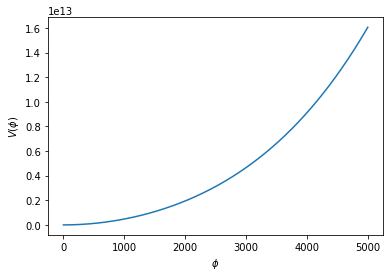

In [119]:
m=parity_model(0.015)
m.plot1d(0,5000,T=3700)

In [100]:
m.findAllTransitions()

Tracing phase starting at x = [3641.0348491] ; t = 0.0
Tracing minimum up
traceMinimum t0 = 0
...........................................................................................................
Tracing phase starting at x = [-1.80411242e-16] ; t = 1906.12271635535
Tracing minimum down
traceMinimum t0 = 1906.12
.................................
Tracing minimum up
traceMinimum t0 = 1906.12
....
Tunneling from phase 1 to phase 0 at T=1899.313
high_vev = [-0.00600718]
low_vev = [597.26274336]
Path deformation converged. 1 steps. fRatio = 6.55942e-14
Tunneling from phase 1 to phase 0 at T=1899.314
high_vev = [-3.99680289e-15]
low_vev = [597.24454068]
Path deformation converged. 1 steps. fRatio = 7.65907e-14
Tunneling from phase 1 to phase 0 at T=1901.216
high_vev = [0.00147411]
low_vev = [515.18010012]
Path deformation converged. 1 steps. fRatio = 2.96112e-14
Tunneling from phase 1 to phase 0 at T=1902.167
high_vev = [-0.00191648]
low_vev = [452.12825774]
Path deformation converged.

[{'low_vev': array([466.55203298]),
  'high_vev': array([0.00127225]),
  'Tnuc': 1901.9872819514542,
  'low_phase': 0,
  'high_phase': 1,
  'instanton': fullTunneling_rval(profile1D=Profile1D(R=array([0.        , 0.00042716, 0.00085432, 0.00128148, 0.00170864,
         0.00213581, 0.00256297, 0.00299013, 0.00341729, 0.00384445,
         0.00427161, 0.00469877, 0.00512593, 0.00555309, 0.00598025,
         0.00640742, 0.00683458, 0.00726174, 0.0076889 , 0.00811606,
         0.00854322, 0.00897038, 0.00939754, 0.0098247 , 0.01025187,
         0.01067903, 0.01110619, 0.01153335, 0.01196051, 0.01238767,
         0.01281483, 0.01324199, 0.01366915, 0.01409631, 0.01452348,
         0.01495064, 0.0153778 , 0.01580496, 0.01623212, 0.01665928,
         0.01708644, 0.0175136 , 0.01794076, 0.01836793, 0.01879509,
         0.01922225, 0.01964941, 0.02007657, 0.02050373, 0.02093089,
         0.02135805, 0.02178521, 0.02221237, 0.02263954, 0.0230667 ,
         0.02349386, 0.02392102, 0.02434818, 0.02